# Email Spam Detection

The Email Spam Detection Project seeks to enhance email security and user experience by leveraging machine learning, ensuring a cleaner inbox, and adapting to new spamming techniques.

## Importing Essentials Library

In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Loading the Dataset

In [162]:
df=pd.read_csv('mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Dataset Information

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Shape of the Dataset

In [164]:
df.shape

(5572, 2)

## Replacing spam and ham input in category column with 0 and 1 respec.

In [165]:
df['Category']=df['Category'].replace('spam',0)
df['Category']=df['Category'].replace('ham',1)

## Assigning X to column message and Y to column category

In [166]:
X=df['Message']
Y=df['Category']

In [167]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [168]:
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: Category, dtype: int64

## Setting Training and testing data percentage

In [169]:
X_train ,X_test, Y_train , Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [170]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [171]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


## Training and testing feature extraction

In [172]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_feature=feature_extraction.fit_transform(X_train)
X_test_feature=feature_extraction.transform(X_test)

Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [173]:
print(X_train_feature)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [174]:
model=LogisticRegression()

In [175]:
model.fit(X_train_feature,Y_train)

LogisticRegression()

## Finding training accuracy

In [183]:
prediction_training=model.predict(X_train_feature)
accuracy_training=accuracy_score(Y_train,prediction_training)

In [177]:
print('Accuracy on training data:',accuracy_training)

Accuracy on training data: 0.9670181736594121


## Finding Testing accuracy

In [178]:
prediction_test=model.predict(X_test_feature)
accuracy_test=accuracy_score(Y_test,prediction_test)

In [179]:
print('Accuracy on test data:',accuracy_test)

Accuracy on test data: 0.9659192825112107


## Checking the mails for spam and ham 

In [185]:
mail=["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18"]
input_data_feature=feature_extraction.transform(mail)
prediction=model.predict(input_data_feature)
print(prediction)
if(prediction[0]==1):
    print('Ham mail')
else:
    print('spam mail')

[0]
spam mail


## Emails Word Cloud

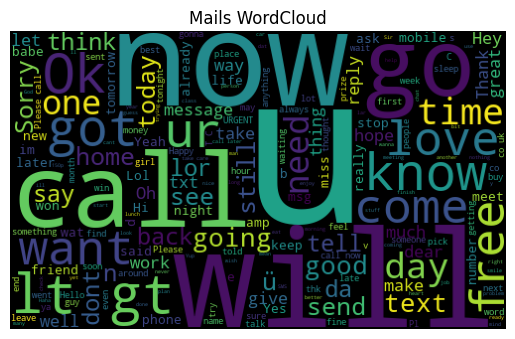

In [194]:
cloud=' '.join(df['Message'])
plt.title('Mails WordCloud')
wordcloud=WordCloud(height=300,width=500,background_color='black').generate(cloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()